<a href="https://colab.research.google.com/github/bcguilherme/Regre-linear-carro/blob/main/Regre_linear_carro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [22]:
dados_carros = pd.read_csv('/content/C+¦pia de CarPrice_Assignment.csv')
dados_carros.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [23]:
dados_carros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [24]:
dados_carros.shape

(205, 26)

In [25]:
dados_carros.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [27]:
colunas_categoricas = ['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'fuelsystem']


le = LabelEncoder()


for coluna in colunas_categoricas:
    dados_carros[coluna + '_encoded'] = le.fit_transform(dados_carros[coluna])

# Exibindo as primeiras linhas do DataFrame com as colunas codificadas
print(dados_carros.head())





   car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  highwaympg    price  \
0  convertible        rwd          front       88.6  ...          27  13495.0   
1  convertible        rwd          front       88.6  ...          27  16500.0   
2    hatchback        rwd          front       94.5  ...          26  16500.0   
3        sedan        fwd          front       99.8  ...          30  13950.0   
4        sedan        4wd          front       99.4  ...          22  17450.0   

   CarName_encoded  fuelty

<Axes: xlabel='price', ylabel='Count'>

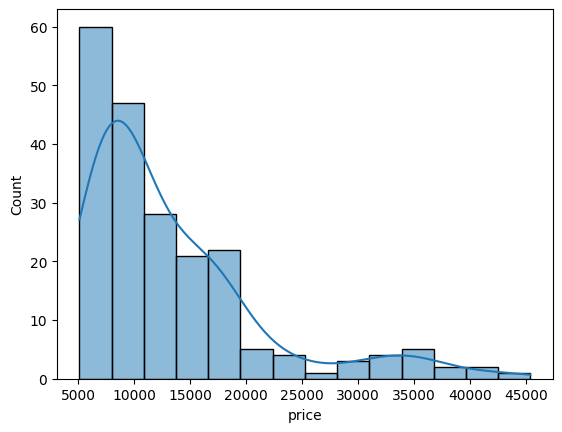

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.histplot(data=dados_carros, x='price', kde=True)

<Axes: xlabel='doornumber', ylabel='Count'>

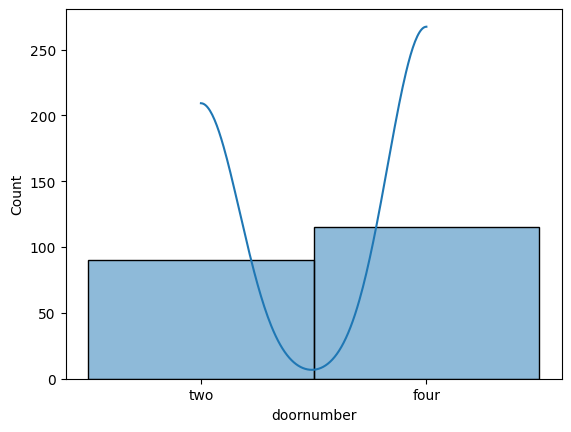

In [31]:
sns.histplot(data=dados_carros, x='doornumber', kde=True)

In [35]:
from sklearn.preprocessing import MinMaxScaler


colunas_numericas = dados_carros.select_dtypes(include=['float64', 'int64']).columns


scaler = MinMaxScaler()

dados_carros_norm = dados_carros.copy()
dados_carros_norm[colunas_numericas] = scaler.fit_transform(dados_carros_norm[colunas_numericas])

print(dados_carros_norm.head())







     car_ID  symboling                   CarName fueltype aspiration  \
0  0.000000        1.0        alfa-romero giulia      gas        std   
1  0.004902        1.0       alfa-romero stelvio      gas        std   
2  0.009804        0.6  alfa-romero Quadrifoglio      gas        std   
3  0.014706        0.8               audi 100 ls      gas        std   
4  0.019608        0.8                audi 100ls      gas        std   

  doornumber      carbody drivewheel enginelocation  wheelbase  ...  \
0        two  convertible        rwd          front   0.058309  ...   
1        two  convertible        rwd          front   0.058309  ...   
2        two    hatchback        rwd          front   0.230321  ...   
3       four        sedan        fwd          front   0.384840  ...   
4       four        sedan        4wd          front   0.373178  ...   

   highwaympg     price  CarName_encoded  fueltype_encoded aspiration_encoded  \
0    0.289474  0.207959         0.013699               1.0 

In [37]:
dados_carros_norm.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,...,highwaympg,price,CarName_encoded,fueltype_encoded,aspiration_encoded,doornumber_encoded,carbody_encoded,drivewheel_encoded,enginelocation_encoded,fuelsystem_encoded
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,...,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.500000,0.566829,0.354419,0.491780,0.467317,0.493740,0.414106,0.248707,0.564111,0.564483,...,0.388190,0.202540,0.528834,0.902439,0.180488,0.439024,0.653659,0.663415,0.014634,0.464808
std,0.290797,0.249061,0.175562,0.184139,0.178767,0.203627,0.201971,0.157142,0.193460,0.149332,...,0.181222,0.198323,0.280922,0.297446,0.385535,0.497483,0.214770,0.278085,0.120377,0.287601
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.400000,0.230321,0.376119,0.316667,0.350000,0.254849,0.135849,0.435714,0.495238,...,0.236842,0.066283,0.301370,1.000000,0.000000,0.000000,0.500000,0.500000,0.000000,0.142857
50%,0.500000,0.600000,0.303207,0.479104,0.433333,0.525000,0.359193,0.222642,0.550000,0.580952,...,0.368421,0.128519,0.547945,1.000000,0.000000,0.000000,0.750000,0.500000,0.000000,0.714286
75%,0.750000,0.800000,0.460641,0.626866,0.550000,0.641667,0.561288,0.301887,0.742857,0.638095,...,0.473684,0.282632,0.787671,1.000000,0.000000,1.000000,0.750000,1.000000,0.000000,0.714286
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [60]:
import statsmodels.formula.api as smf
import pandas as pd


function = ' price ~ symboling +	CarName +	fueltype +	aspiration +	doornumber +	carbody +	drivewheel +	enginelocation +	wheelbase	+	enginesize	+fuelsystem	+boreratio	+stroke	+compressionratio	+horsepower	+peakrpm	+citympg	+highwaympg'

model = smf.ols(formula=function, data=dados_carros_norm).fit()


print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                     31.34
Date:                Sat, 26 Aug 2023   Prob (F-statistic):           2.10e-19
Time:                        18:13:54   Log-Likelihood:                 559.99
No. Observations:                 205   AIC:                            -778.0
Df Residuals:                      34   BIC:                            -209.7
Df Model:                         170                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

In [62]:
function = ' price ~ symboling + fueltype +	aspiration +	doornumber +	carbody +	drivewheel +	enginelocation +	wheelbase	+	enginesize	+fuelsystem	+boreratio	+stroke	+compressionratio	+horsepower	+peakrpm	+citympg	+highwaympg'

model = smf.ols(formula=function, data=dados_carros_norm).fit()


print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     54.83
Date:                Sat, 26 Aug 2023   Prob (F-statistic):           3.17e-71
Time:                        18:14:35   Log-Likelihood:                 266.60
No. Observations:                 205   AIC:                            -479.2
Df Residuals:                     178   BIC:                            -389.5
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  0

In [63]:
function = ' price ~ symboling + fueltype +	aspiration +	doornumber +	carbody +	drivewheel +	enginelocation +	wheelbase	+	enginesize	+ boreratio	+stroke	+compressionratio	+horsepower	+peakrpm	+citympg	+highwaympg'

model = smf.ols(formula=function, data=dados_carros_norm).fit()


print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     67.40
Date:                Sat, 26 Aug 2023   Prob (F-statistic):           1.40e-73
Time:                        18:15:06   Log-Likelihood:                 258.51
No. Observations:                 205   AIC:                            -475.0
Df Residuals:                     184   BIC:                            -405.2
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  0

In [66]:
function = ' price ~ symboling + fueltype +	aspiration +	doornumber +	carbody +	drivewheel +	enginelocation +	wheelbase	+	enginesize	+ boreratio	+stroke	+horsepower	+peakrpm	+citympg	+highwaympg'
model = smf.ols(formula=function, data=dados_carros_norm).fit()


print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     71.24
Date:                Sat, 26 Aug 2023   Prob (F-statistic):           1.81e-74
Time:                        18:16:42   Log-Likelihood:                 258.40
No. Observations:                 205   AIC:                            -476.8
Df Residuals:                     185   BIC:                            -410.3
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  0

In [67]:
function = ' price ~ symboling + fueltype +	aspiration + carbody +	drivewheel +	enginelocation +	wheelbase	+	enginesize	+ boreratio	+stroke	+horsepower	+peakrpm	+citympg	+highwaympg'
model = smf.ols(formula=function, data=dados_carros_norm).fit()


print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     75.60
Date:                Sat, 26 Aug 2023   Prob (F-statistic):           2.05e-75
Time:                        18:17:03   Log-Likelihood:                 258.40
No. Observations:                 205   AIC:                            -478.8
Df Residuals:                     186   BIC:                            -415.7
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  0

In [68]:
function = ' price ~ symboling + fueltype +	aspiration + drivewheel +	enginelocation +	wheelbase	+	enginesize	+ boreratio	+stroke	+horsepower	+peakrpm	+citympg	+highwaympg'
model = smf.ols(formula=function, data=dados_carros_norm).fit()


print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     90.94
Date:                Sat, 26 Aug 2023   Prob (F-statistic):           3.34e-76
Time:                        18:18:01   Log-Likelihood:                 250.52
No. Observations:                 205   AIC:                            -471.0
Df Residuals:                     190   BIC:                            -421.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  0

In [70]:
function = ' price ~ symboling + fueltype +	aspiration +	enginelocation +	wheelbase	+	enginesize	+ boreratio	+stroke	+horsepower	+peakrpm	+citympg	+highwaympg'
model = smf.ols(formula=function, data=dados_carros_norm).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     101.7
Date:                Sat, 26 Aug 2023   Prob (F-statistic):           2.50e-76
Time:                        18:18:33   Log-Likelihood:                 245.80
No. Observations:                 205   AIC:                            -465.6
Df Residuals:                     192   BIC:                            -422.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  0

In [71]:
function = ' price ~ symboling + fueltype +	aspiration +	enginelocation +	wheelbase	+	enginesize	+ boreratio	+stroke	+horsepower	+peakrpm	+citympg	+highwaympg -1'
model = smf.ols(formula=function, data=dados_carros_norm).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     101.7
Date:                Sat, 26 Aug 2023   Prob (F-statistic):           2.50e-76
Time:                        18:18:53   Log-Likelihood:                 245.80
No. Observations:                 205   AIC:                            -465.6
Df Residuals:                     192   BIC:                            -422.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
fueltype[diesel]           0

In [72]:
function = ' price ~ symboling + aspiration +	enginelocation +	wheelbase	+	enginesize	+ boreratio	+stroke	+horsepower	+peakrpm	+citympg	+highwaympg -1'
model = smf.ols(formula=function, data=dados_carros_norm).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     104.3
Date:                Sat, 26 Aug 2023   Prob (F-statistic):           5.62e-75
Time:                        18:19:11   Log-Likelihood:                 239.91
No. Observations:                 205   AIC:                            -455.8
Df Residuals:                     193   BIC:                            -416.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
aspiration[std]           -0

In [74]:
function = ' price ~ symboling + aspiration +	enginelocation +	wheelbase	+	enginesize	+ boreratio	+stroke	+horsepower	+peakrpm	+ highwaympg -1'
model = smf.ols(formula=function, data=dados_carros_norm).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     115.0
Date:                Sat, 26 Aug 2023   Prob (F-statistic):           6.60e-76
Time:                        18:20:08   Log-Likelihood:                 239.64
No. Observations:                 205   AIC:                            -457.3
Df Residuals:                     194   BIC:                            -420.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
aspiration[std]           -0

In [75]:
function = ' price ~ symboling + aspiration +	enginelocation +	wheelbase	+	enginesize	+ boreratio	+stroke	+horsepower	+peakrpm	+  -1'
model = smf.ols(formula=function, data=dados_carros_norm).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     128.4
Date:                Sat, 26 Aug 2023   Prob (F-statistic):           5.67e-77
Time:                        18:20:25   Log-Likelihood:                 239.64
No. Observations:                 205   AIC:                            -459.3
Df Residuals:                     195   BIC:                            -426.0
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -0

In [ ]:
x = dados_carros[[ 'CarName	' 'symboling' , 'aspiration1' ,	'enginelocation' ,	'wheelbase'	,	'enginesize'	, 'boreratio'	, 'stroke'	, 'horsepower'	, 'peakrpm']]
y = dados_carros[['price']]


In [76]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.2, random_state=42)

lr = LinearRegression()

lr.fit(x, y)

LinearRegression()

LinearRegression()

In [77]:
r_sqr = lr.score(x, y)
r_sqr


0.8624462562549661

In [78]:
y_pred_treino = lr.predict(x_treino)

print('MAE:', metrics.mean_absolute_error(y_treino,y_pred_treino))
print('MSE:', metrics.mean_squared_error(y_treino,y_pred_treino))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_treino,y_pred_treino)))


MAE: 0.0539104098645457
MSE: 0.005188674245423968
RMSE: 0.07203245272392138


In [79]:
y_pred_teste = lr.predict(x_teste)

print('MAE:', metrics.mean_absolute_error(y_teste,y_pred_teste))
print('MSE:', metrics.mean_squared_error(y_teste,y_pred_teste))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_teste,y_pred_teste)))

MAE: 0.05529120455541144
MSE: 0.006164708398808442
RMSE: 0.07851565702971887
